In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv("dataset.csv")

In [3]:
df.head()

,Location,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
0,AUS,1992,6.6,1.43,16.71,1.43
1,AUS,1994,6.4,2.36,18.48,2.36
2,AUS,1995,6.5,2.89,20.55,2.89
3,AUS,1996,6.4,2.96,21.95,2.96
4,AUS,1997,6.2,3.53,23.34,3.53


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       518 non-null    object 
 1   Time           518 non-null    int64  
 2   Hospital_Stay  518 non-null    float64
 3   MRI_Units      518 non-null    float64
 4   CT_Scanners    518 non-null    float64
 5   Hospital_Beds  518 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 24.4+ KB


In [5]:
df.shape

(518, 6)

In [6]:
df.isnull().sum()

Location         0
Time             0
Hospital_Stay    0
MRI_Units        0
CT_Scanners      0
Hospital_Beds    0
dtype: int64

In [7]:
df['Location'].value_counts()

Location
HUN    29
FIN    28
RUS    25
AUS    23
AUT    23
ITA    22
FRA    21
CAN    20
ISR    19
LTU    19
CZE    19
KOR    18
NLD    18
DEU    18
LUX    17
TUR    17
LVA    16
BEL    16
SVK    16
EST    14
POL    14
IRL    13
USA    13
ISL    12
SVN    12
GBR    12
NZL    11
GRC    10
ESP     9
JPN     7
DNK     4
PRT     3
Name: count, dtype: int64

In [8]:
df.describe(include='all')

,Location,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
count,518,518.000000,518.000000,518.000000,518.000000,518.000000
unique,32,NaN,NaN,NaN,NaN,NaN
top,HUN,NaN,NaN,NaN,NaN,NaN
freq,29,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.967181,7.140154,10.565502,19.646718,10.565502
std,NaN,6.944160,2.566864,8.685570,14.352069,8.685570
min,NaN,1990.000000,3.400000,0.100000,1.480000,0.100000
25%,NaN,2003.250000,5.800000,4.072500,10.332500,4.072500
50%,NaN,2009.000000,6.650000,8.765000,15.375000,8.765000
75%,NaN,2014.000000,7.500000,13.877500,26.592500,13.877500


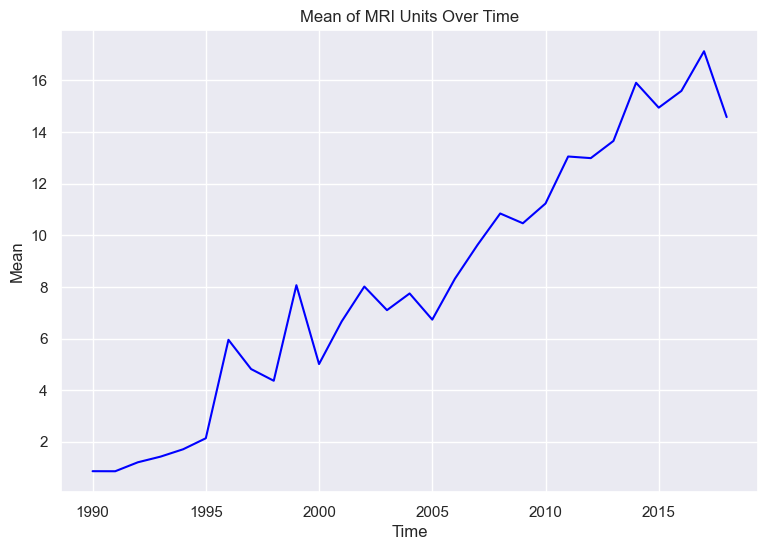

In [46]:
sns.set(style='darkgrid')

# First figure: Mean of MRI_Units
fig1, ax1 = plt.subplots(figsize=(9, 6))  # Specify size for the first figure
df.groupby('Time')['MRI_Units'].mean().plot(ax=ax1, ylabel='Mean', color='blue')
ax1.set_title('Mean of MRI Units Over Time')  # Optional title
plt.show()



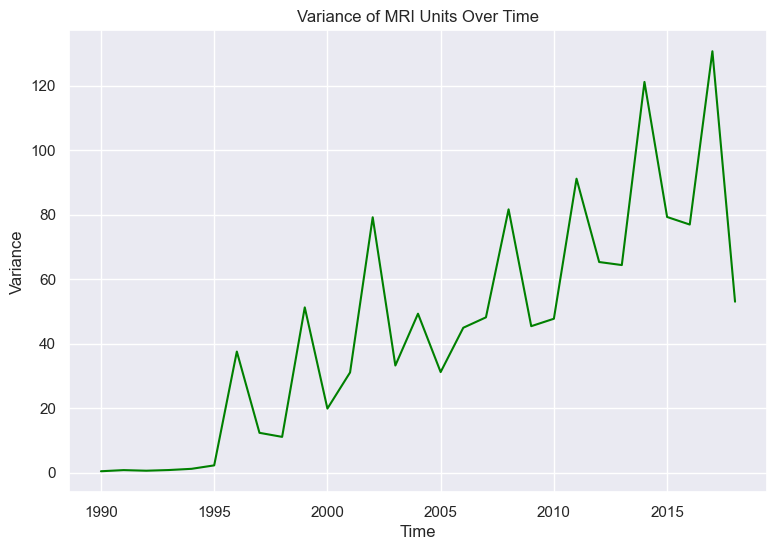

In [47]:
# Second figure: Variance of MRI_Units
fig2, ax2 = plt.subplots(figsize=(9, 6))  # Specify size for the second figure
df.groupby('Time')['MRI_Units'].var().plot(ax=ax2, ylabel='Variance', color='green')
ax2.set_title('Variance of MRI Units Over Time')  # Optional title
plt.show()

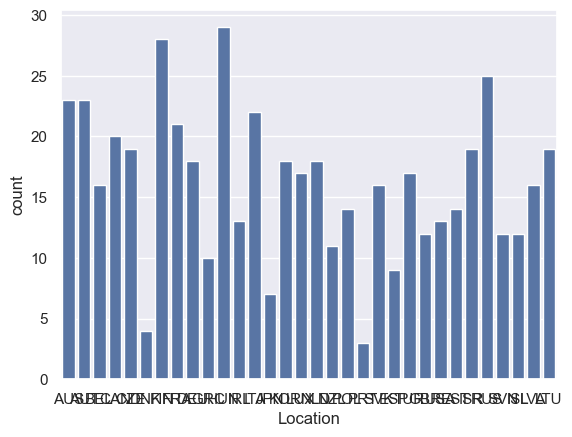

In [10]:
sns.countplot(x='Location', data=df, )
plt.show()

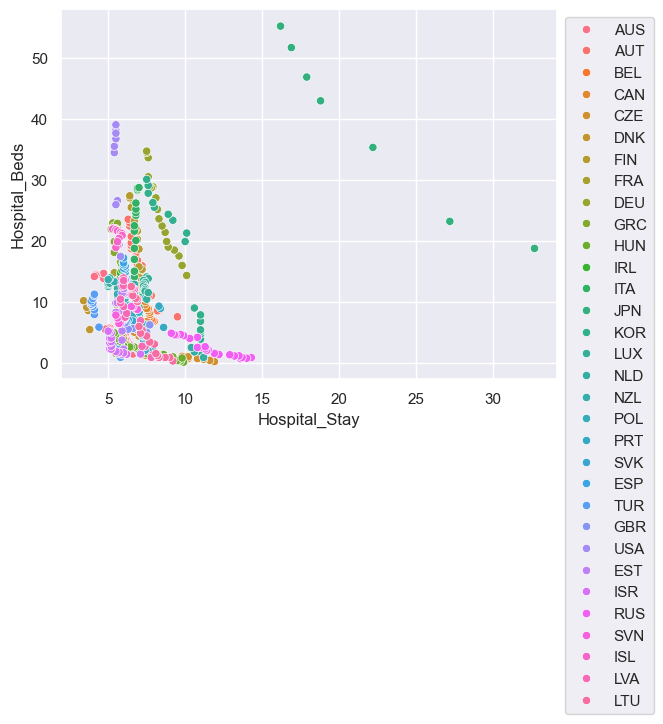

In [11]:
sns.scatterplot(x='Hospital_Stay', y='Hospital_Beds',
                hue='Location', data=df, )
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

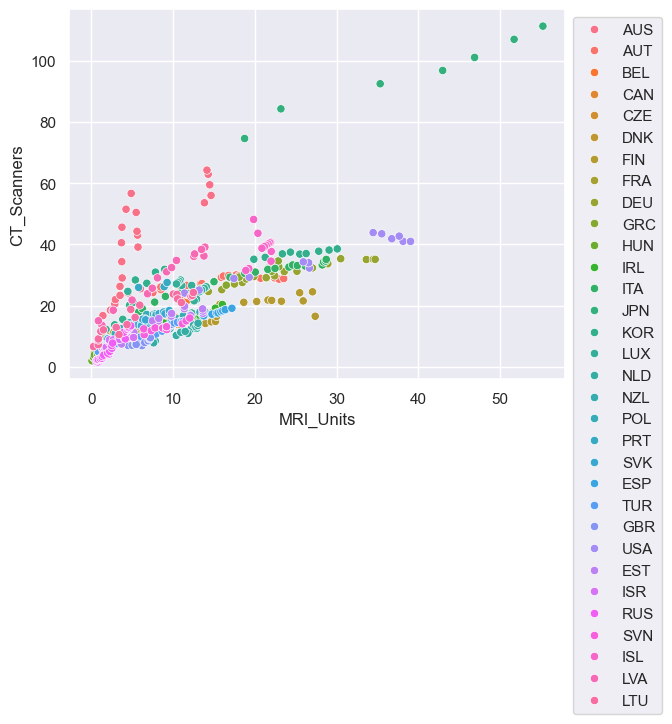

In [12]:
sns.scatterplot(x='MRI_Units', y='CT_Scanners',
                hue='Location', data=df, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

Text(0.5, 1.0, 'Correlation matrix for each indicator')

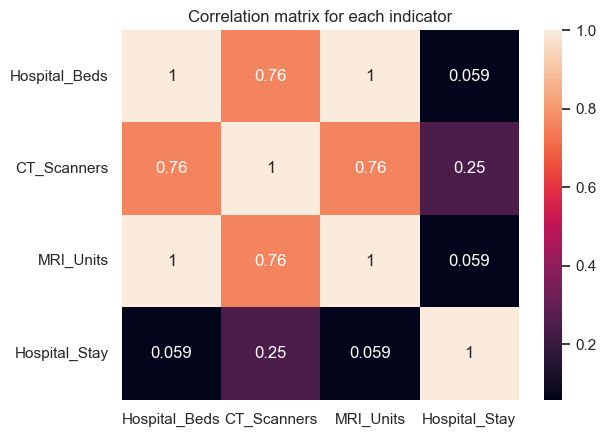

In [13]:
g = sns.heatmap(df[["Hospital_Beds", "CT_Scanners", "MRI_Units", "Hospital_Stay"]].corr(),
                annot=True, cmap="rocket")
g.set_title("Correlation matrix for each indicator")


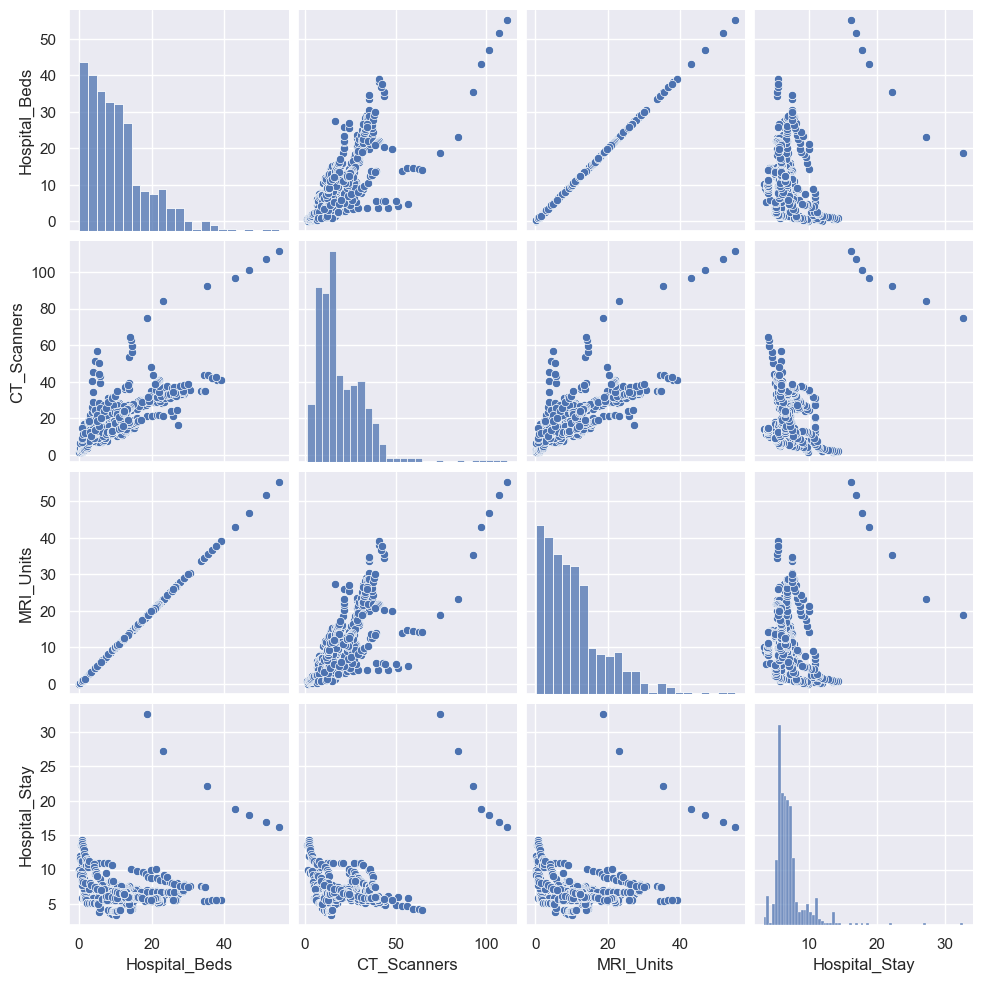

In [14]:
g = sns.pairplot(df[["Hospital_Beds", "CT_Scanners", "MRI_Units", "Hospital_Stay"]])

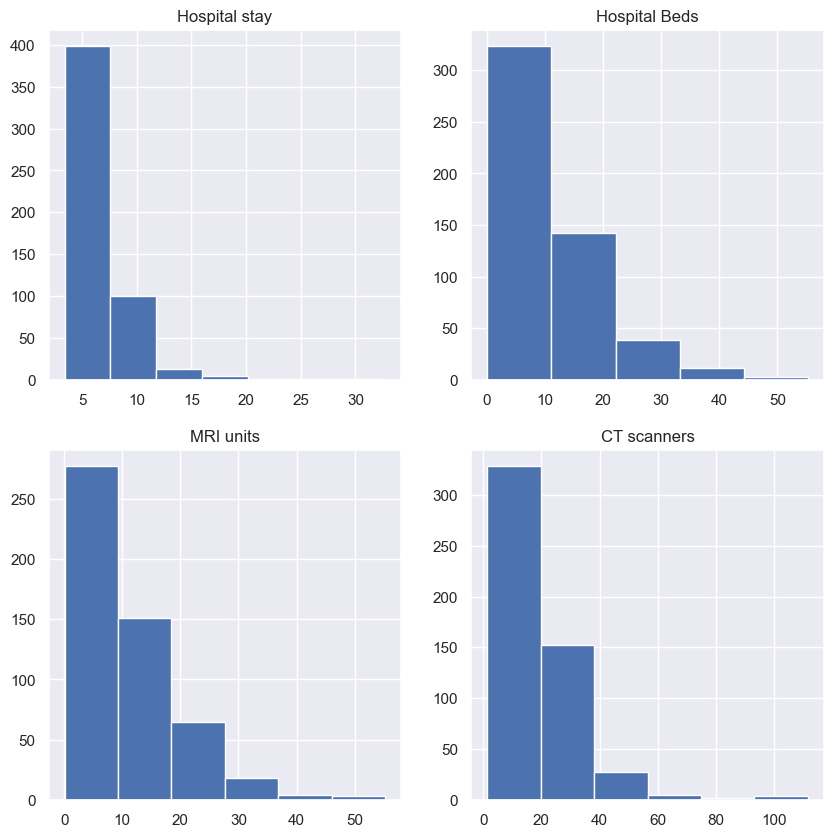

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
 
axes[0,0].set_title("Hospital stay")
axes[0,0].hist(df['Hospital_Stay'], bins=7)
 
axes[0,1].set_title("Hospital Beds")
axes[0,1].hist(df['Hospital_Beds'], bins=5);
 
axes[1,0].set_title("MRI units")
axes[1,0].hist(df['MRI_Units'], bins=6);
 
axes[1,1].set_title("CT scanners")
axes[1,1].hist(df['CT_Scanners'], bins=6);

### DATA AUGMENTATION

In [16]:
# Add noise to numerical columns
numerical_cols = ['Hospital_Beds', 'CT_Scanners', 'MRI_Units', 'Hospital_Stay']
augmented_data = df.copy()

for col in numerical_cols:
    noise = np.random.normal(0, 0.01, size=df[col].shape)  # Mean 0, Std Dev 0.01
    augmented_data[col] += noise

# Combine original and augmented data
data = pd.concat([df, augmented_data], ignore_index=True)


In [17]:
data.shape

(1036, 6)

In [18]:
data.isnull().sum()

Location         0
Time             0
Hospital_Stay    0
MRI_Units        0
CT_Scanners      0
Hospital_Beds    0
dtype: int64

### SMOGN IMPLEMENTING ON DATA

In [23]:
import smogn
target_col = "Hospital_Stay"

# Apply SMOGN for regression oversampling
df_resampled = smogn.smoter(
    data=data,
    y=target_col,        # Target variable for regression
    k=5,                 # Number of nearest neighbors
    samp_method="extreme"  # Handling extreme minority values
)

print("Original dataset size:", data.shape)
print("Resampled dataset size:", df_resampled.shape)

r_index: 100%|########################################################################| 93/93 [00:00<00:00, 273.84it/s]

Original dataset size: (1036, 6)
Resampled dataset size: (1577, 6)


In [24]:
df_resampled['Time'] = df_resampled['Time'].astype(int)


In [25]:
df_resampled.head()

,Location,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
0,PRT,2006,8.498824,8.283897,26.131069,8.283897
1,PRT,2007,8.280845,9.147999,25.872401,8.670381
2,PRT,2007,8.411520,8.541567,26.819737,8.763447
3,PRT,2006,8.498824,6.824854,26.018835,6.824854
4,PRT,2007,8.246481,9.241232,27.163438,9.522844


### DATA SPLITTING

In [26]:
X = df_resampled.drop('Hospital_Stay',axis=1)
y = df_resampled['Hospital_Stay']

In [27]:
X.columns

Index(['Location', 'Time', 'MRI_Units', 'CT_Scanners', 'Hospital_Beds'], dtype='object')

In [28]:
value_map = {
    'PRT': 1, 'DEU': 2, 'HUN': 3, 'LTU': 4, 'KOR': 5, 'RUS': 6, 'CAN': 7, 'CZE': 8, 
    'NLD': 9, 'JPN': 10, 'AUT': 11, 'AUS': 12, 'BEL': 13, 'DNK': 14, 'FIN': 15, 
    'FRA': 16, 'GRC': 17, 'IRL': 18, 'ITA': 19, 'LUX': 20, 'NZL': 21, 'POL': 22, 
    'SVK': 23, 'ESP': 24, 'TUR': 25, 'GBR': 26, 'USA': 27, 'EST': 28, 'ISR': 29, 
    'SVN': 30, 'ISL': 31, 'LVA': 32
}

# Assign the mapped values to the column
X['Location'] = X['Location'].map(value_map)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X  = pd.DataFrame(sc.fit_transform(X),columns=X.columns)

In [30]:
X.shape

(1577, 5)

In [31]:
y.shape

(1577,)

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

model = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # 1: Manhattan distance, 2: Euclidean distance
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [34]:
best_y_pred=grid_search.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,roc_auc_score

mse = mean_squared_error(y_test, best_y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, best_y_pred)
r2 = r2_score(y_test, best_y_pred)

print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R²: {r2}")


MSE: 0.7449750249793946, RMSE: 0.8631193573193655, MAE: 0.2277110061565072, R²: 0.9568895137103208


In [40]:

y_pred = grid_search.predict(X_test)
threshold = 5  # This is a threshold value for classification
y_binary = (y_test > threshold).astype(int)  # 1 for "Long Stay", 0 for "Short Stay"

# Convert predictions to binary predictions based on the same threshold
y_pred_binary = (y_pred > threshold).astype(int)

# Compute AUC for the binary classification task
auc = roc_auc_score(y_binary, y_pred_binary)
print(f'AUC: {auc}')

AUC: 0.99


In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Example: Convert predictions to binary classes using a threshold
threshold = 6.5  # Example threshold
y_pred_class = (grid_search.predict(X_test) > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Calculate classification metrics
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.9945945945945946
Recall: 0.9813333333333333
F1 Score: 0.9879194630872483


In [43]:
import pickle
with open('Grid_Model1.pkl', 'wb') as file:
    pickle.dump(grid_search, file)

In [35]:
import numpy as np

# Assuming the model is already trained using GridSearchCV
best_model = grid_search.best_estimator_

# Function to test the model with user input
def test_model_with_user_input():
    print("Enter values for the following features:")

    try:
        # Accept user inputs
        location = float(input("Location (numeric representation or encoded value): "))
        time = float(input("Time (year): "))
        mri_units = float(input("Number of MRI Units: "))
        ct_scanners = float(input("Number of CT Scanners: "))
        hospital_beds = float(input("Number of Hospital Beds: "))

        # Prepare the input as a NumPy array
        user_input = np.array([[location, time, mri_units, ct_scanners, hospital_beds]])

        # If scaling or preprocessing is applied, include it here
        # Example: user_input = scaler.transform(user_input)

        # Predict using the model
        prediction = best_model.predict(user_input)

        print(f"\nPredicted value (Hospital Stay): {prediction[0]} days")
    
    except ValueError:
        print("Invalid input. Please enter numeric values for all features.")

# Call the function
test_model_with_user_input()


Enter values for the following features:


Location (numeric representation or encoded value):  5
Time (year):  7
Number of MRI Units:  7
Number of CT Scanners:  7
Number of Hospital Beds:  7



Predicted value (Hospital Stay): 16.20150269289712 days


C:\Users\Main Python2\anaconda3\envs\proj13\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


C:\Users\Main Python2\AppData\Local\Temp\ipykernel_4756\3054401444.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_names, y=metric_values, palette='viridis')  # Create bar plot


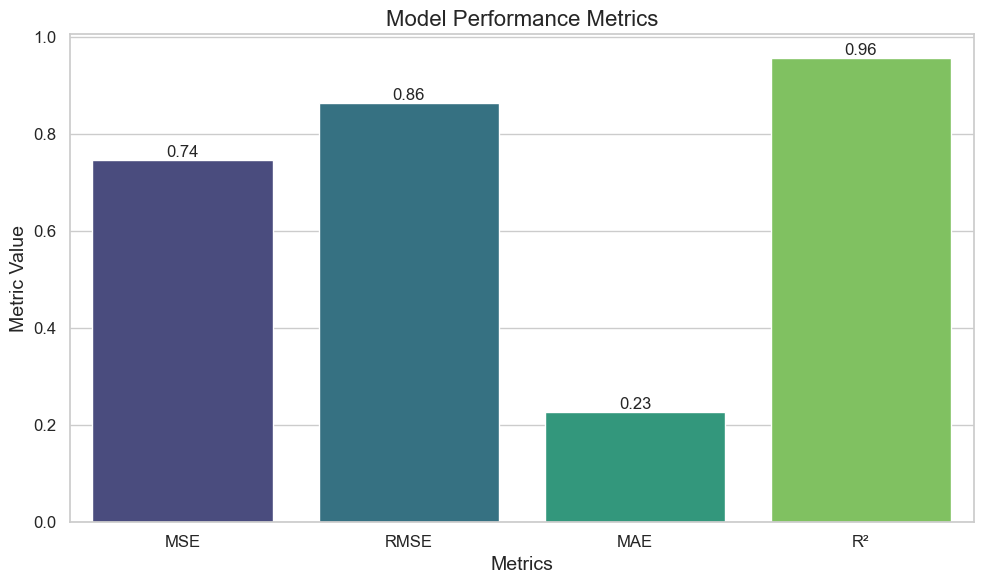

In [48]:
# Performance metrics
metrics = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R²': r2}

# Convert metrics to a dataframe for better handling (optional)
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

# Plotting
sns.set(style='whitegrid')  # Set style for the plot
plt.figure(figsize=(10, 6))  # Set figure size
sns.barplot(x=metric_names, y=metric_values, palette='viridis')  # Create bar plot

# Add value annotations
for i, value in enumerate(metric_values):
    plt.text(i, value, f"{value:.2f}", ha='center', va='bottom', fontsize=12)

# Customizations
plt.title('Model Performance Metrics', fontsize=16)
plt.ylabel('Metric Value', fontsize=14)
plt.xlabel('Metrics', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

C:\Users\Main Python2\AppData\Local\Temp\ipykernel_4756\1100563988.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_names, y=metric_values, palette='coolwarm')  # Create bar plot


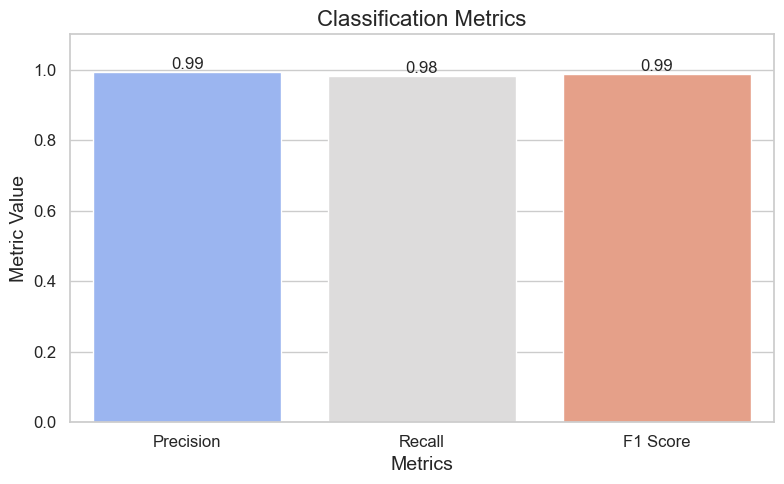

In [49]:
# Classification metrics
metrics = {'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Convert metrics to a list for plotting
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

# Plotting
sns.set(style='whitegrid')  # Set plot style
plt.figure(figsize=(8, 5))  # Set figure size
sns.barplot(x=metric_names, y=metric_values, palette='coolwarm')  # Create bar plot

# Add value annotations
for i, value in enumerate(metric_values):
    plt.text(i, value, f"{value:.2f}", ha='center', va='bottom', fontsize=12)

# Customizations
plt.title('Classification Metrics', fontsize=16)
plt.ylabel('Metric Value', fontsize=14)
plt.xlabel('Metrics', fontsize=14)
plt.ylim(0, 1.1)  # Set y-axis range to include 0 and slightly above 1
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()